In [72]:
import pandas as pd
import json
import os
from pprint import pprint
from collections import defaultdict
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
data_dir = r"raw_data\insta"
hashtags = ["abkibaar400paar", "chunavkaparv", "electioncommission", "indianelection", "loksabhaelection2024", "sharadpawar"]
total_count = {}

for hashtag in hashtags:
    file = hashtag+'.json'
    file_path = os.path.join(data_dir, file)

    with open(file_path, 'r', encoding="utf-8") as f:
        data = json.load(f)

    total_count[hashtag] = data['count']
    media = data['data']['hashtag']
    dict_hash = {
        "id":[],
        "type":[],
        "comments_count":[],
        "likes_count":[],
        "upload_date":[]
    }

    for nodes in media['edge_hashtag_to_media']['edges']:
        idx = nodes['node']['id']
        type_node = nodes['node']['__typename']
        comments = nodes['node']['edge_media_to_comment']['count']
        likes = nodes['node']['edge_liked_by']['count']
        upload = datetime.fromtimestamp(nodes['node']['taken_at_timestamp'])

        dict_hash["id"].append(idx)
        dict_hash["type"].append(type_node)
        dict_hash["comments_count"].append(comments)
        dict_hash["likes_count"].append(likes)
        dict_hash["upload_date"].append(upload)

    pd.DataFrame.from_dict(dict_hash).to_csv(rf'process_data\insta\{hashtag}.csv')

In [74]:
total_count

{'abkibaar400paar': 425955,
 'chunavkaparv': 73077,
 'electioncommission': 101589,
 'indianelection': 7914,
 'loksabhaelection2024': 791188,
 'sharadpawar': 316227}

In [75]:
data.keys()

dict_keys(['count', 'data', 'status'])

In [76]:
media = data['data']['hashtag']

In [77]:
print(media.keys(), len(media), sep='\n\n')

dict_keys(['id', 'name', 'allow_following', 'is_following', 'is_top_media_only', 'profile_pic_url', 'edge_hashtag_to_media', 'edge_hashtag_to_top_posts', 'edge_hashtag_to_content_advisory', 'edge_hashtag_to_related_tags', 'edge_hashtag_to_null_state'])

11


In [78]:
pprint(media, sort_dicts=False)

{'id': '17842057393068276',
 'name': 'sharadpawar',
 'allow_following': False,
 'is_following': False,
 'is_top_media_only': False,
 'profile_pic_url': 'https://instagram.fixu1-1.fna.fbcdn.net/v/t39.30808-6/448519903_919163883590891_1317356706025396270_n.jpg?stp=c0.135.1080.1080a_dst-jpg_e15_s150x150&_nc_ht=instagram.fixu1-1.fna.fbcdn.net&_nc_cat=111&_nc_ohc=-0HDxIA4mrwQ7kNvgGqgK37&edm=AOUPxh0AAAAA&ccb=7-5&oh=00_AYCthGfoWkWkB048NQalE4ek1zMc2N1YTFcTwaW4e4xhNQ&oe=6692E60E&_nc_sid=9dc660',
 'edge_hashtag_to_media': {'count': 316227,
                           'page_info': {'has_next_page': True,
                                         'end_cursor': 'QVFEd1BTTnIyN3B1cGNMZmJFOVlXeXd1S0wyRHNJQV8tY3E5SU95QTZHTF94YmJqNFl3dUdzbkFaY091OHRaQXJpZzlOc3Z4ZFExOVRQelpTRW52R1lrYw=='},
                           'edges': [{'node': {'comments_disabled': False,
                                               '__typename': 'GraphImage',
                                               'id': '3408328692214719

In [79]:
types_post = defaultdict(int)

In [80]:
for i in media['edge_hashtag_to_media']['edges']:
    types_post[i['node']['__typename']]+=1

In [81]:
types_post

defaultdict(int, {'GraphImage': 53, 'GraphVideo': 2, 'GraphSidecar': 4})

In [82]:
dict_hash = {
    "id":[],
    "type":[],
    "comments_count":[],
    "likes_count":[],
    "upload_date":[]
}

In [83]:
for nodes in media['edge_hashtag_to_media']['edges']:
    idx = nodes['node']['id']
    type_node = nodes['node']['__typename']
    comments = nodes['node']['edge_media_to_comment']['count']
    likes = nodes['node']['edge_liked_by']['count']
    upload = datetime.fromtimestamp(nodes['node']['taken_at_timestamp'])

    dict_hash["id"].append(idx)
    dict_hash["type"].append(type_node)
    dict_hash["comments_count"].append(comments)
    dict_hash["likes_count"].append(likes)
    dict_hash["upload_date"].append(upload)

In [84]:
pprint(dict_hash, sort_dicts=False)

{'id': ['3408328692214719399',
        '3408327712525869582',
        '3408325045090008101',
        '3408315486003355199',
        '3408313625982027494',
        '3408312840226973248',
        '3408304609650530300',
        '3408299728590378408',
        '3408296856885313235',
        '3408294651772878048',
        '3408290931691026054',
        '3408276940332804216',
        '3408269297128081390',
        '3408268500688832361',
        '3408267897699502530',
        '3408267463378045831',
        '3408258233104742248',
        '3408241116470910674',
        '3408238211120284063',
        '3408237195856193954',
        '3408235603227103717',
        '3408234905377873359',
        '3408231652755176528',
        '3408231522639704831',
        '3408229521042302433',
        '3408224350799101068',
        '3408218132508473199',
        '3408208734046762202',
        '3408204566931279623',
        '3408203914796440267',
        '3408201375774431353',
        '3408200658293087754',
        

In [85]:
df = pd.DataFrame.from_dict(dict_hash)

In [86]:
df.head()

,id,type,comments_count,likes_count,upload_date
0,3408328692214719399,GraphImage,0,1,2024-07-09 16:57:44
1,3408327712525869582,GraphVideo,0,39,2024-07-09 16:55:55
2,3408325045090008101,GraphImage,0,0,2024-07-09 16:50:28
3,3408315486003355199,GraphImage,16,2310,2024-07-09 16:31:29
4,3408313625982027494,GraphImage,3,126,2024-07-09 16:27:47


In [87]:
df.describe()

,comments_count,likes_count,upload_date
count,59.000000,59.000000,59
mean,7.677966,498.237288,2024-07-09 13:05:12.389830144
min,0.000000,0.000000,2024-07-09 01:50:57
25%,0.000000,0.000000,2024-07-09 11:54:27
50%,0.000000,8.000000,2024-07-09 12:49:49
75%,2.500000,157.000000,2024-07-09 14:56:30
max,141.000000,5899.000000,2024-07-09 16:57:44
std,22.170531,1208.763380,NaN


In [88]:
df.columns

Index(['id', 'type', 'comments_count', 'likes_count', 'upload_date'], dtype='object')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              59 non-null     object        
 1   type            59 non-null     object        
 2   comments_count  59 non-null     int64         
 3   likes_count     59 non-null     int64         
 4   upload_date     59 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 2.4+ KB


<Axes: ylabel='count'>

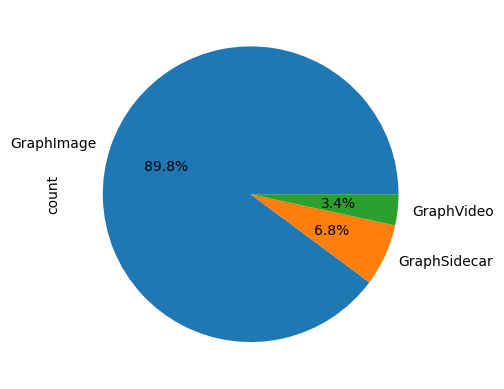

In [90]:
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [91]:
df['upload_date'] = pd.to_datetime(df['upload_date'])

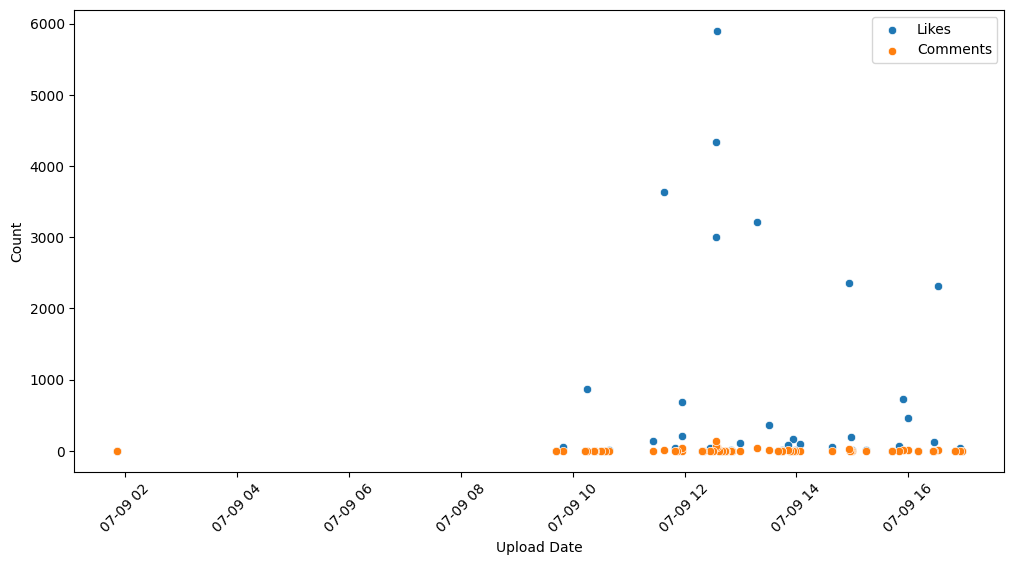

In [92]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x='upload_date', y='likes_count', data=df, label='Likes', ax=ax)
sns.scatterplot(x='upload_date', y='comments_count', data=df, label='Comments', ax=ax)
ax.set_xlabel('Upload Date')
ax.set_ylabel('Count')
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [93]:
df['upload_date']

0    2024-07-09 16:57:44
1    2024-07-09 16:55:55
2    2024-07-09 16:50:28
3    2024-07-09 16:31:29
4    2024-07-09 16:27:47
5    2024-07-09 16:26:14
6    2024-07-09 16:09:52
7    2024-07-09 16:00:11
8    2024-07-09 15:54:29
9    2024-07-09 15:50:06
10   2024-07-09 15:43:01
11   2024-07-09 15:14:54
12   2024-07-09 14:59:43
13   2024-07-09 14:58:08
14   2024-07-09 14:56:56
15   2024-07-09 14:56:04
16   2024-07-09 14:37:44
17   2024-07-09 14:03:43
18   2024-07-09 13:57:57
19   2024-07-09 13:55:56
20   2024-07-09 13:52:46
21   2024-07-09 13:51:23
22   2024-07-09 13:44:55
23   2024-07-09 13:44:40
24   2024-07-09 13:40:41
25   2024-07-09 13:30:25
26   2024-07-09 13:18:03
27   2024-07-09 12:59:23
28   2024-07-09 12:51:06
29   2024-07-09 12:49:49
30   2024-07-09 12:44:46
31   2024-07-09 12:43:20
32   2024-07-09 12:43:01
33   2024-07-09 12:40:19
34   2024-07-09 12:37:22
35   2024-07-09 12:34:46
36   2024-07-09 12:34:13
37   2024-07-09 12:33:51
38   2024-07-09 12:30:54
39   2024-07-09 12:26:53
